In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
#determining the total no. of images and labels
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


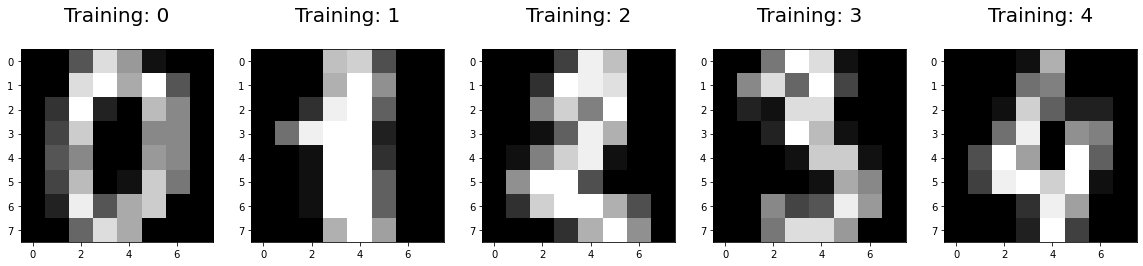

In [3]:
#displaying some of images and labels
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index + 1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title("Training: %i\n" %label, fontsize = 20)

In [4]:
#dividing dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [5]:
#Making Instance of the model and training it
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train,y_train)

C:\Users\piyus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
#predicting the output
print(logisticRegr.predict(x_test[0].reshape(1,-1)))
print(logisticRegr.predict(x_test[0:10]))
predictions = logisticRegr.predict(x_test)
print(predictions)

[4]
[4 0 9 1 8 7 1 5 1 6]
[4 0 9 1 8 7 1 5 1 6 6 7 6 1 5 5 8 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 8 5 7 9 8 9 6 1 7 0 1 9 7 3 3 1 8 8 8 9 8 5 8 4 8 3 5 8 4 3 9 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 1 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 8 5 0 3 9 2 7 3 2 0 8 1 9 2 1 5 1 0 3 4 3 0 8 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 1 3 1 1 9 5 4 8 7 4 8 9 5 7 6 9 4 0 4 0 0 9 0 6 5 8 8
 3 7 9 2 0 3 2 7 3 0 2 1 5 2 7 0 6 9 3 3 1 3 5 2 8 5 2 1 2 9 4 6 5 5 5 9 7
 1 5 9 6 3 7 1 7 5 1 7 2 7 5 5 4 8 6 6 2 8 7 3 7 8 0 3 5 7 4 3 4 1 0 3 3 5
 4 1 3 1 2 5 1 4 0 3 1 5 5 7 4 0 1 0 9 5 5 5 4 0 1 8 6 2 1 1 1 7 9 6 7 9 7
 0 4 9 6 9 2 7 2 1 0 8 2 8 6 5 7 8 4 5 7 8 6 4 2 6 9 3 0 0 8 0 6 6 7 1 4 5
 6 9 7 2 8 5 1 2 4 1 8 8 7 6 0 8 0 6 1 5 7 8 0 4 1 4 5 9 2 2 3 9 1 3 9 3 2
 8 0 6 5 6 2 5 2 3 2 6 1 0 7 6 0 6 2 7 0 3 2 4 2 3 6 9 7 7 0 3 5 4 1 2 2 1
 2 7 7 0 4 9 8]


In [10]:
#determining the accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9516908212560387


In [11]:
#Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1.0, 'Accuracy score: 0.9516908212560387')

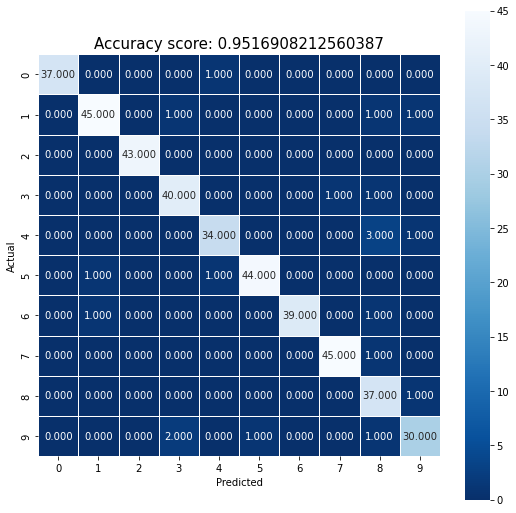

In [12]:
#representing the confusion matrix in heat map
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap="Blues_r")
plt.ylabel("Actual")
plt.xlabel("Predicted")
title = "Accuracy score: {0}".format(score)
plt.title(title, size = 15)